In [1]:
# 傅里叶变换相关， wave， freq & time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# functions
def triangle_wave(size, T):
    t = np.linspace(-1, 1, size, endpoint=False)
    y = np.abs(t)
    y = np.tile(y, T) - 0.5
    x = np.linspace(0, 2*np.pi*T, size*T, endpoint=False)
    return x, y


def sawtooth_wave(size, T):
    t = np.linspace(-1, 1, size)
    y = np.tile(t, T)
    x = np.linspace(0, 2*np.pi*T, size*T, endpoint=False)
    return x, y


def triangle_wave2(size, T):
    x, y = sawtooth_wave(size, T)
    return x, np.abs(y)


def non_zero(f):
    f1 = np.real(f)
    f2 = np.imag(f)
    eps = 1e-4
    return f1[(f1 > eps) | (f1 < -eps)], f2[(f2 > eps) | (f2 < -eps)]

In [4]:
# main function
mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False
np.set_printoptions(suppress=True)

In [5]:
x = np.linspace(0, 2*np.pi, 16, endpoint=False)
print('时域采样值：', x)
y = np.sin(2*x) + np.sin(3*x + np.pi/4) + np.sin(5*x)

N = len(x)
print('采样点个数：', N)
print('\n原始信号：', y)
f = np.fft.fft(y)
print('\n频域信号：', f/N)
a = np.abs(f/N)
print('\n频率强度：', a)

时域采样值： [ 0.          0.39269908  0.78539816  1.17809725  1.57079633  1.96349541
  2.35619449  2.74889357  3.14159265  3.53429174  3.92699082  4.3196899
  4.71238898  5.10508806  5.49778714  5.89048623]
采样点个数： 16

原始信号： [ 0.70710678  2.55486585  0.29289322 -0.59945618  0.29289322 -0.70710678
 -0.70710678  0.59945618 -0.70710678 -1.14065228  1.70710678  2.01366975
 -0.29289322 -0.70710678 -1.29289322 -2.01366975]

频域信号： [-0.00000000+0.j          0.00000000+0.j         -0.00000000-0.5j
  0.35355339-0.35355339j  0.00000000+0.j         -0.00000000-0.5j
  0.00000000-0.j          0.00000000-0.j          0.00000000+0.j
  0.00000000-0.j          0.00000000+0.j          0.00000000+0.5j
  0.00000000-0.j          0.35355339+0.35355339j  0.00000000+0.5j
 -0.00000000+0.j        ]

频率强度： [ 0.   0.   0.5  0.5  0.   0.5  0.   0.   0.   0.   0.   0.5  0.   0.5  0.5
  0. ]


In [6]:
iy = np.fft.ifft(f)
print('\n逆傅里叶变换恢复信号：', iy)
print('\n虚部：', np.imag(iy))
print('\n实部：', np.real(iy))
print('\n恢复信号与原始信号是否相同：', np.allclose(np.real(iy), y))


逆傅里叶变换恢复信号： [ 0.70710678+0.j  2.55486585+0.j  0.29289322-0.j -0.59945618+0.j
  0.29289322+0.j -0.70710678+0.j -0.70710678-0.j  0.59945618+0.j
 -0.70710678+0.j -1.14065228-0.j  1.70710678+0.j  2.01366975-0.j
 -0.29289322-0.j -0.70710678-0.j -1.29289322+0.j -2.01366975-0.j]

虚部： [ 0.  0. -0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0. -0.  0. -0.]

实部： [ 0.70710678  2.55486585  0.29289322 -0.59945618  0.29289322 -0.70710678
 -0.70710678  0.59945618 -0.70710678 -1.14065228  1.70710678  2.01366975
 -0.29289322 -0.70710678 -1.29289322 -2.01366975]

恢复信号与原始信号是否相同： True


频率采样值： [ 0.          0.39269908  0.78539816  1.17809725  1.57079633  1.96349541
  2.35619449  2.74889357  3.14159265  3.53429174  3.92699082  4.3196899
  4.71238898  5.10508806  5.49778714  5.89048623]


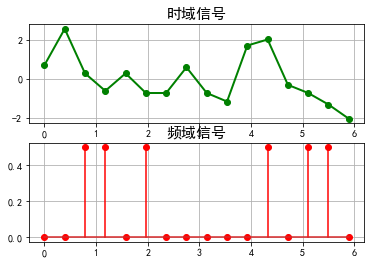

In [7]:
plt.figure(facecolor='w')
plt.subplot(211)
plt.plot(x, y, 'go-', lw=2)
plt.title('时域信号', fontsize=15)
plt.grid(True)
plt.subplot(212)
w = np.arange(N) * 2*np.pi / N
print('频率采样值：', w)
plt.stem(w, a, linefmt='r-', markerfmt='ro')
plt.title('频域信号', fontsize=15)
plt.grid(True)
plt.show()

原始频域信号： (array([ 20.43172909,   2.42592   ,   1.        ,   0.62980809,
         0.51254282,   0.51254282,   0.62980809,   1.        ,
         2.42592   ,  20.43172909]), array([], dtype=float64))
f_real = 
 [  0.          -0.           0.           0.           0.          20.43172909
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           2.42592      0.           0.           0.           0.
  -0.           0.           0.           0.           0.           1.          -0.
   0.           0.           0.          -0.           0.           0.           0.
   0.           0.62980809   0.          -0.          -0.           0.          -0.
  -0.           0.           0.           0.           0.51254282  -0.          -0.
   0.           0.           0.          -0.           0.           0.          -0.
   0.51254282   0.          -0.          -0.           0.          -0.          -0.
   0.          -0.           0.         

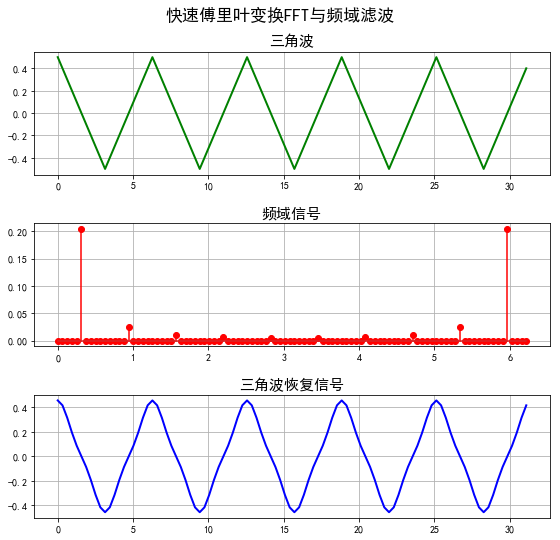

In [12]:
# 三角/锯齿波
x, y = triangle_wave(20, 5)
# x, y = sawtooth_wave(20, 5)
N = len(y)
f = np.fft.fft(y)
print('原始频域信号：', non_zero(f))
a = np.abs(f / N)

# np.real_if_close
f_real = np.real(f)
eps = 0.1 * f_real.max()
print('f_real = \n', f_real)
print(eps)

f_real[(f_real < eps) & (f_real > -eps)] = 0
f_imag = np.imag(f)
eps = 0.3 * f_imag.max()
print(eps)
f_imag[(f_imag < eps) & (f_imag > -eps)] = 0
f1 = f_real + f_imag * 1j
y1 = np.fft.ifft(f1)
y1 = np.real(y1)
print('恢复频域信号：', non_zero(f1))

plt.figure(figsize=(8, 8), facecolor='w')
plt.subplot(311)
plt.plot(x, y, 'g-', lw=2)
plt.title('三角波', fontsize=15)
plt.grid(True)
plt.subplot(312)
w = np.arange(N) * 2*np.pi / N
plt.stem(w, a, linefmt='r-', markerfmt='ro')
plt.title('频域信号', fontsize=15)
plt.grid(True)
plt.subplot(313)
plt.plot(x, y1, 'b-', lw=2, markersize=4)
plt.title('三角波恢复信号', fontsize=15)
plt.grid(True)
plt.tight_layout(1.5, rect=[0, 0.04, 1, 0.96])
plt.suptitle('快速傅里叶变换FFT与频域滤波', fontsize=17)
plt.show()